### Demo Notebook: Visualizing MNIST data

*Author:* Maximilian Matthe (Goehte University Frankfurt)

*This version:* 12/13/2018

This is a quick demonstration, how interactive Jupyter Notebooks could be applied in an introductory data science course.

----
## 0. Introduction:

The aim of this demonstration is to visualize structure high-dimensional data.

We will compare two techniques: 
- PCA
- t-SNE

----

## 1. Getting the Data

We import the MNIST data set, available from the *sklearn* library (thus, no need to download it manually).

Data comes as a "bunch" object, from which we extract:
- the features X (RGB pixel values)
- the target $y \in \{0, ..., 9\}$

In [17]:
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


All in all we have 70,000 observations with 784 features (= 28*28 pixels) each

In [30]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

print('Size of the dataframe: {} \n'.format(df.shape))
print("Different values of target variable: {}".format(df.label.unique()))

Size of the dataframe: (70000, 785) 

Different values of target variable: ['0.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']


----
## 2. Explore the Data

First, let's take a look at some randomlly selected observations.

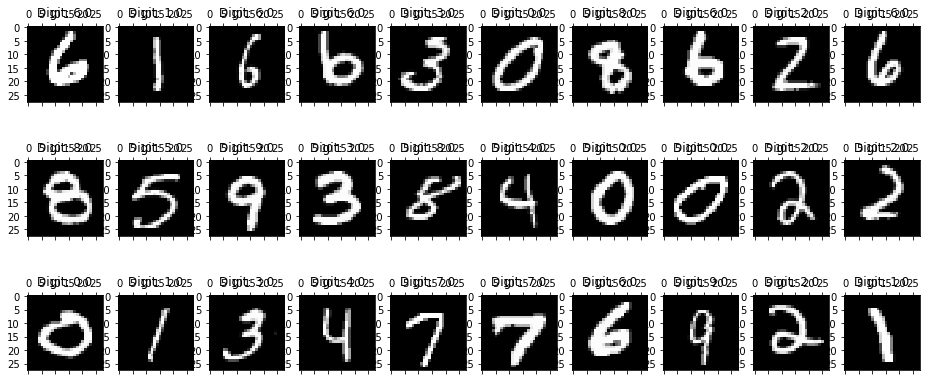

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

----
## 3. Visualizing the Data

### 3.1 PCA

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.09746116  0.07155445  0.06149531]


In [33]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

ModuleNotFoundError: No module named 'ggplot'

### 3.2 T-SNE

In [1]:
from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

NameError: name 'time' is not defined

In [ ]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart